In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import xlsxwriter 
%matplotlib inline

In [2]:
x_set=[]
pw=0.3
pw2=0.6

In [3]:
# full gaussian pulse 
dt=0.01
T=np.arange(-5,5,dt)
x=np.zeros(len(T))
x2=np.zeros(len(T))
for j in range(len(T)):
    x[j]=math.exp(-(T[j]/(math.sqrt(2)*(pw/2.355)))**2)
    x2[j]=math.exp(-(T[j]/(math.sqrt(2)*(pw2/2.355)))**2)

(-5.49949999999999, 5.489499999999777)

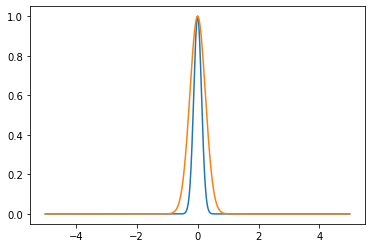

In [4]:
plt.plot(T,x)
plt.plot(T,x2)
plt.xlim()

In [5]:
def NGD(x):
#     alpha = 20
#     beta =  1
#     K = 20
#     g = 10
#     alpha, beta, K, g =8,0.6,37,10
    alpha, beta, K, g =6,1.6,22,10
    y=np.zeros(len(x))
    z=np.zeros(len(x))
    for j in range(len(x)-1):
        dy=dt*(-alpha*y[j]+K*(x[j]-z[j]))
        dz=dt*(-beta*z[j]+g*y[j])
        y[j+1]=y[j]+dy
        z[j+1]=z[j]+dz
    return y,z

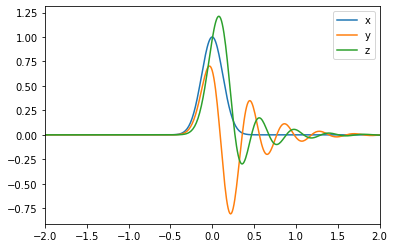

response delay = -0.030000000000105942


In [6]:
y,z=NGD(x)
y2,z2=NGD(x2)
plt.plot(T,x)
plt.plot(T,y)
plt.plot(T,z)
plt.xlim(-2,2)
plt.legend(('x','y','z'))
plt.show()
print('response delay =',T[np.argmax(y)])

In [7]:
# y[y<0]=0
# plt.plot(T,y)
# y2[y2>0]=0
# y2=-y2
# plt.plot(T,y2)
# plt.xlim(-2,2)
# plt.plot(T,x/2)

# save excel file
# workbook = xlsxwriter.Workbook('F:/我的雲端硬碟/Retina exp/Retina as NGD paper submit/data/NGD_Gaussian_simulation.xlsx') 
# worksheet = workbook.add_worksheet()
# for i in range(len(T)):
#     worksheet.write(i,0,T[i])
#     worksheet.write(i,1,x[i]/max(x))
#     worksheet.write(i,2,y[i]/max(y))
# workbook.close()

response delay 1 = -0.030000000000105942
response delay 2 = -0.16000000000010317


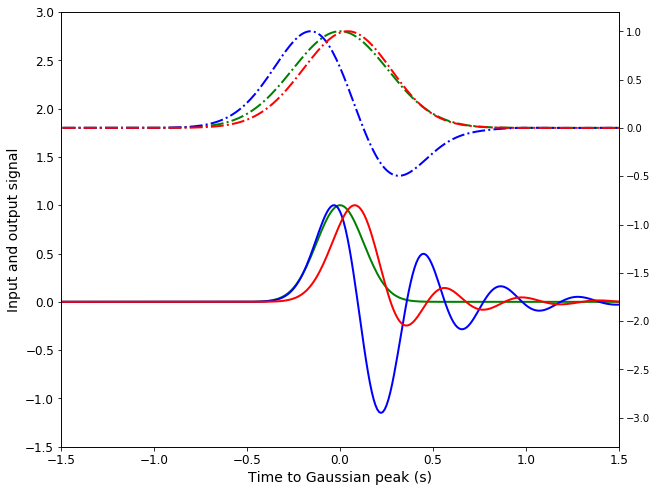

In [20]:
f1,ax1=plt.subplots(figsize=(10,8))
ax2=ax1.twinx()
ax1.plot(T,x/max(x),color='g',ls='-',lw=2,label=r'$x(t); \sigma_G=0.3 s$')
ax1.plot(T,y/max(y),color='b',ls='-',lw=2,label=r'$y(t); \sigma_G=0.3 s$')
ax1.plot(T,z/max(z),color='r',ls='-',lw=2,label=r'$z(t); \sigma_G=0.3 s$')
ax2.plot(T,x2/max(x2),color='g',ls='-.',lw=2,label=r'$x(t); \sigma_G=0.6 s$')
ax2.plot(T,y2/max(y2),color='b',ls='-.',lw=2,label=r'$y(t); \sigma_G=0.6 s$')
ax2.plot(T,z2/max(z2),color='r',ls='-.',lw=2,label=r'$z(t); \sigma_G=0.6 s$')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(-1.5,3)
ax2.set_ylim(-3.3,1.2)
ax1.set_ylabel('Input and output signal',fontsize=14)
ax1.set_xlabel('Time to Gaussian peak (s)',fontsize=14)
ax1.tick_params(axis='x',labelsize='12')
ax1.tick_params(axis='y',labelsize='12')
# ax1.legend((r'$x(t); \sigma_G=0.3 s$',r'$x(t); \sigma_G=0.6 s$',r'$y(t); \sigma_G=0.3 s$',r'$y(t); \sigma_G=0.6 s$'))
print('response delay 1 =',T[np.argmax(y)])
print('response delay 2 =',T[np.argmax(y2)])

In [9]:
# f1.savefig('F:/我的雲端硬碟/Master Thesis/Figures/Simulation result/gaussian simulation.png',dpi=300)

response delay 1 = -0.030000000000105942
response delay 2 = -0.16000000000010317


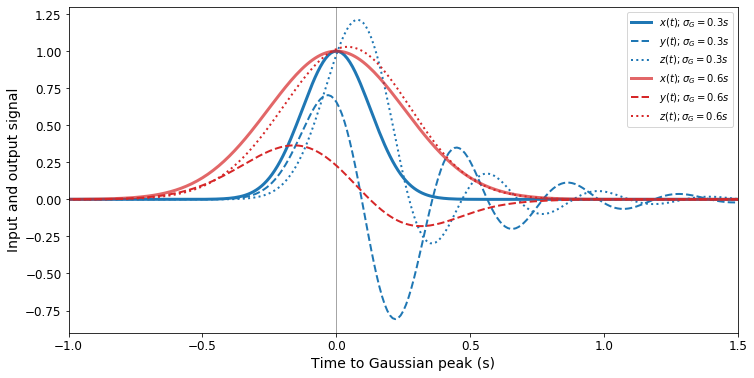

In [58]:
f1,ax1=plt.subplots(figsize=(12,6))
ax1.axvline(x=0,linewidth=1,linestyle='-',color=[0.5,0.5,0.5],alpha=0.7)
# ax2=ax1.twinx()
ax1.plot(T,x,color='tab:blue',ls='-',lw=3,label=r'$x(t); \sigma_G=0.3 s$')
ax1.plot(T,y,color='tab:blue',ls='--',lw=2,label=r'$y(t); \sigma_G=0.3 s$')
ax1.plot(T,z,color='tab:blue',ls=':',lw=2,label=r'$z(t); \sigma_G=0.3 s$')
ax1.plot(T,x2,color='tab:red',ls='-',lw=3,label=r'$x(t); \sigma_G=0.6 s$',alpha=0.7)
ax1.plot(T,y2,color='tab:red',ls='--',lw=2,label=r'$y(t); \sigma_G=0.6 s$',alpha=1)
ax1.plot(T,z2,color='tab:red',ls=':',lw=2,label=r'$z(t); \sigma_G=0.6 s$',alpha=1)

ax1.set_xlim(-1,1.5)
ax1.set_ylim(-0.9,1.3)
ax1.set_ylabel('Input and output signal',fontsize=14)
ax1.set_xlabel('Time to Gaussian peak (s)',fontsize=14)
ax1.tick_params(axis='x',labelsize='12')
ax1.tick_params(axis='y',labelsize='12')
ax1.legend()
# ax1.legend((r'$x(t); \sigma_G=0.3 s$',r'$x(t); \sigma_G=0.6 s$',r'$y(t); \sigma_G=0.3 s$',r'$y(t); \sigma_G=0.6 s$'))
print('response delay 1 =',T[np.argmax(y)])
print('response delay 2 =',T[np.argmax(y2)])

In [59]:
f1.savefig('F:/我的雲端硬碟/Master Thesis/Figures/Simulation result/gaussian simulation2.pdf')